# **Proyek Predictive Analytics: Prediksi Penyakit Jantung**

- **Nama:** Muhammad Husain Fadhlillah
- **Email Student:** mc006d5y2343@student.devacademy.id
- **Cohort ID:** MC006D5Y2343

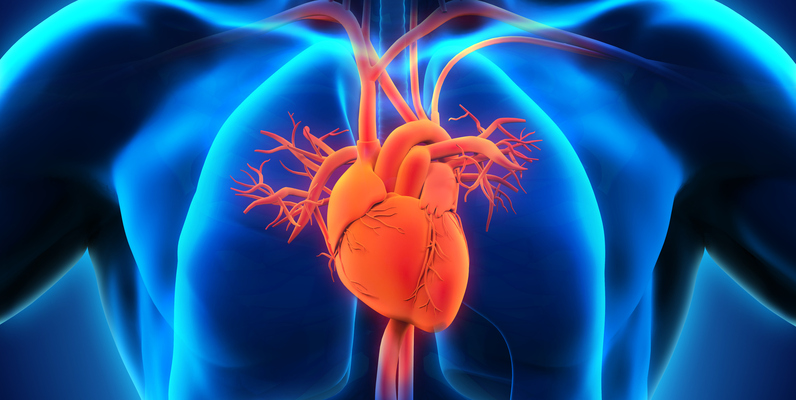

### **Overview Proyek**

Proyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi risiko penyakit jantung pada pasien berdasarkan data klinis dan demografis. Dengan menggunakan pendekatan klasifikasi, proyek ini membandingkan performa dua model, yaitu *Logistic Regression* dan *Random Forest*, untuk menemukan solusi prediksi yang paling akurat dan andal. Proyek ini juga mencakup tahapan *data cleaning*, *exploratory data analysis* (EDA), dan optimisasi model melalui *hyperparameter tuning*.

## **1. Mengimpor Library yang Dibutuhkan**
Langkah pertama adalah mengimpor semua library Python yang akan digunakan.

In [1]:
# Mengabaikan peringatan yang tidak relevan agar output lebih bersih
import warnings
warnings.filterwarnings('ignore')

# Library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library dari Scikit-learn untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Mengatur agar plot ditampilkan inline di notebook
%matplotlib inline

* **Metode yang Digunakan:** Impor library standar untuk analisis data (`pandas`, `numpy`), visualisasi (`matplotlib`, `seaborn`), dan machine learning (`scikit-learn`). Juga mengimpor `GridSearchCV`, yang menunjukkan adanya langkah optimisasi model.
* **Alasan Penggunaan:** Setiap library memiliki peran penting: `pandas` untuk memuat dan memanipulasi data, `matplotlib` dan `seaborn` untuk membuat visualisasi yang informatif, dan `scikit-learn` sebagai framework utama untuk membangun dan mengevaluasi model machine learning.
* **Insight dan Hasil:** Berhasil mempersiapkan *environment* kerja dengan semua *tools* yang diperlukan untuk tahapan selanjutnya.

## **2. Data Loading dan Understanding**
Pada tahap ini akan memuat dataset, yaitu "Heart Failure Prediction" dari file CSV yang diunggah. Dataset ini memiliki 918 sampel.

Sumber dataset: Heart Failure Prediction Dataset [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction]

In [2]:
# Memuat dataset dari file CSV
# Pastikan file 'heart.csv' berada di direktori yang sama atau unggah ke environment Colab
df = pd.read_csv('heart.csv')

# Menampilkan 5 baris pertama dari dataframe
print("Data Awal (5 baris pertama):")
display(df.head())

# Menampilkan informasi dasar dataframe untuk memahami tipe data dan non-null counts
print("\nInformasi DataFrame:")
df.info()

# Variabel target kita adalah 'HeartDisease' (1: Gagal Jantung, 0: Sehat)

Data Awal (5 baris pertama):


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


* **Analisis:**
    * **Tabel `df.head()`:** Output ini menampilkan 5 sampel pertama dari dataset, memberikan gambaran awal mengenai struktur dan isi data. Terlihat ada campuran fitur numerik (seperti `Age`, `RestingBP`) dan kategorikal (seperti `Sex`, `ChestPainType`).
    * **Tabel `df.info()`:** Output ini sangat krusial.
        * **Metode yang Digunakan:** Fungsi `.info()` dari `pandas`.
        * **Alasan Penggunaan:** Untuk mendapatkan ringkasan teknis dataset, termasuk jumlah total entri, nama setiap kolom, jumlah nilai non-null, dan tipe data (Dtype).
        * **Insight dan Hasil:**
            * **Jumlah Sampel:** Dataset memiliki **918 entri**.
            * **Missing Values:** Semua kolom memiliki 918 nilai non-null, yang berarti **tidak ada nilai yang hilang (missing values)**. Ini menyederhanakan tahap *data cleaning*.
            * **Tipe Data:** Terdapat campuran tipe data `int64`, `float64`, dan `object`. Fitur dengan tipe `object` adalah fitur kategorikal yang perlu ditangani pada tahap *preprocessing*.


## **3. Exploratory Data Analysis (EDA)**
Melakukan analisis dan visualisasi pada data untuk mendapatkan wawasan lebih dalam. Ini termasuk memeriksa distribusi fitur, keseimbangan kelas target, dan korelasi antar fitur.

In [3]:
# Menampilkan statistik deskriptif untuk fitur numerik
print("Statistik Deskriptif:")
display(df.describe())

# Memisahkan fitur numerik dan kategorikal untuk analisis lebih lanjut
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Variabel target 'HeartDisease' adalah numerik (0 atau 1) jadi kita pindahkan dari categorical
numerical_cols.remove('HeartDisease')

print(f"\nFitur Numerik: {numerical_cols}")
print(f"Fitur Kategorikal: {categorical_cols}")

Statistik Deskriptif:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Fitur Numerik: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Fitur Kategorikal: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


* **Analisis:**
    * **Tabel `df.describe()`:**
        * **Metode:** Fungsi `.describe()` dari `pandas`.
        * **Alasan:** Untuk menghasilkan statistik deskriptif (jumlah, rata-rata, standar deviasi, min, max, kuartil) untuk semua fitur numerik.
        * **Insight:**
            * Terdapat beberapa nilai yang tidak biasa, seperti `RestingBP` dan `Cholesterol` dengan nilai minimum 0. Ini kemungkinan adalah data yang tidak valid atau *data entry error*, karena tekanan darah dan kolesterol tidak mungkin bernilai 0 pada pasien hidup. Namun, karena jumlahnya sedikit dan tidak ada informasi lebih lanjut, kita dapat membiarkannya dan membiarkan model yang lebih robust (seperti Random Forest) menanganinya.
            * Rentang nilai antar fitur sangat bervariasi (misalnya `Age` vs `Cholesterol`), yang mengindikasikan perlunya **standarisasi fitur** pada tahap *preprocessing*.
    * **Identifikasi Fitur:** Kode berhasil memisahkan fitur menjadi dua kelompok: **numerik** dan **kategorikal**, yang akan mempermudah penerapan teknik *preprocessing* yang berbeda pada masing-masing kelompok.

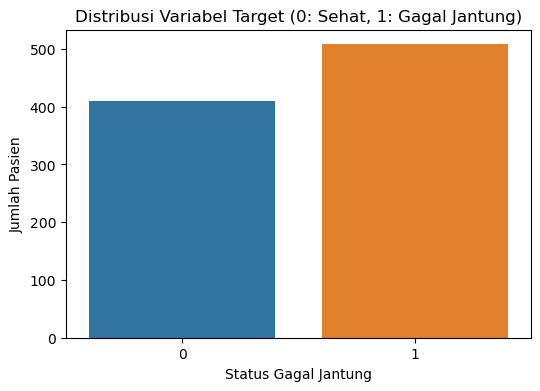

1    508
0    410
Name: HeartDisease, dtype: int64


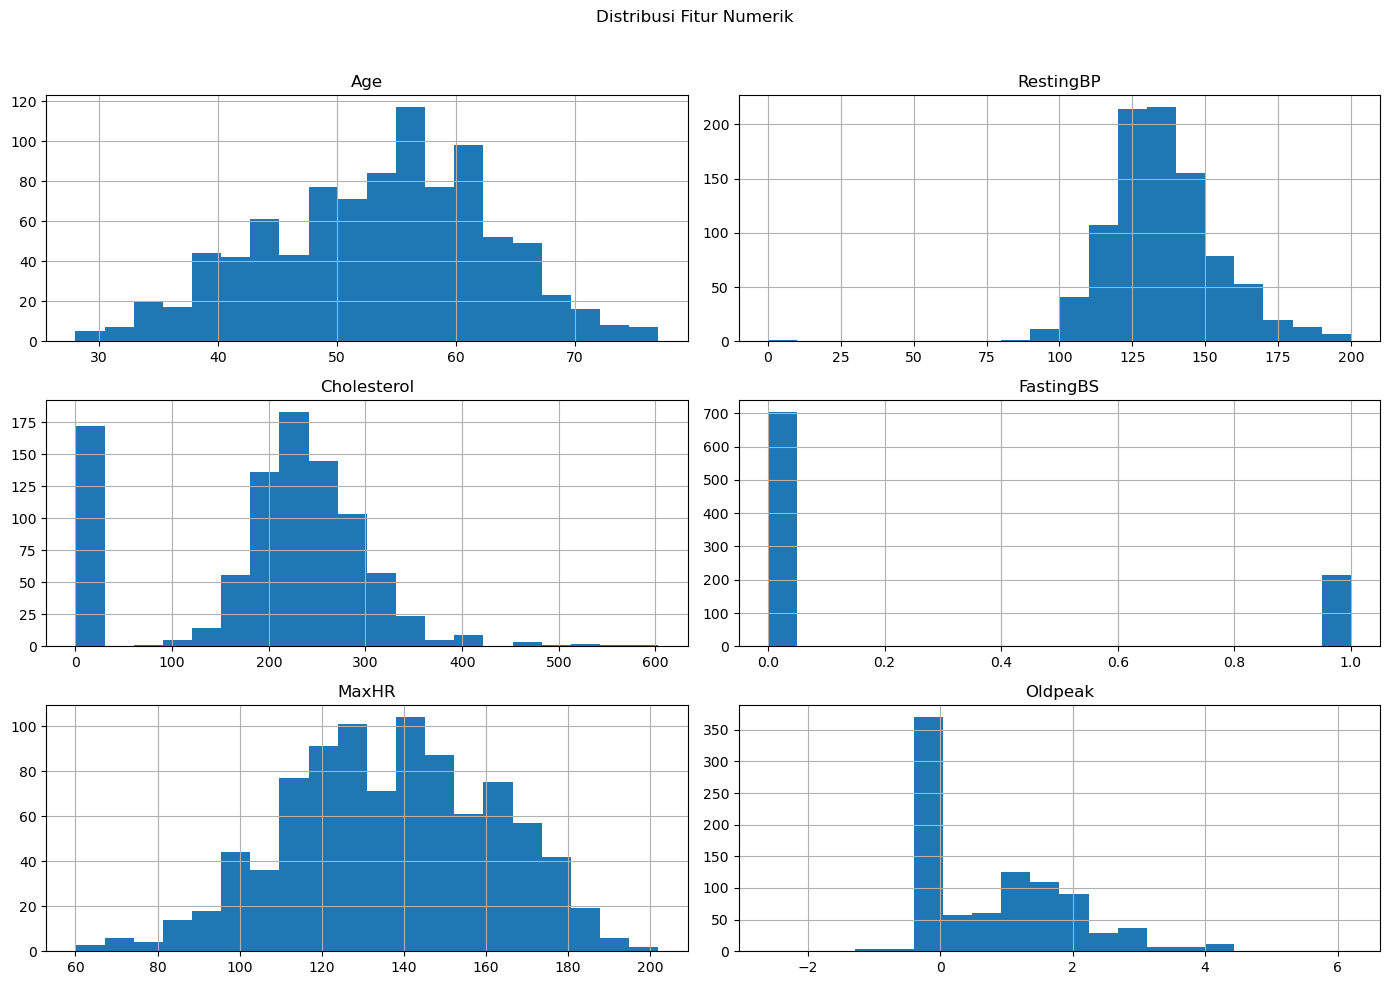

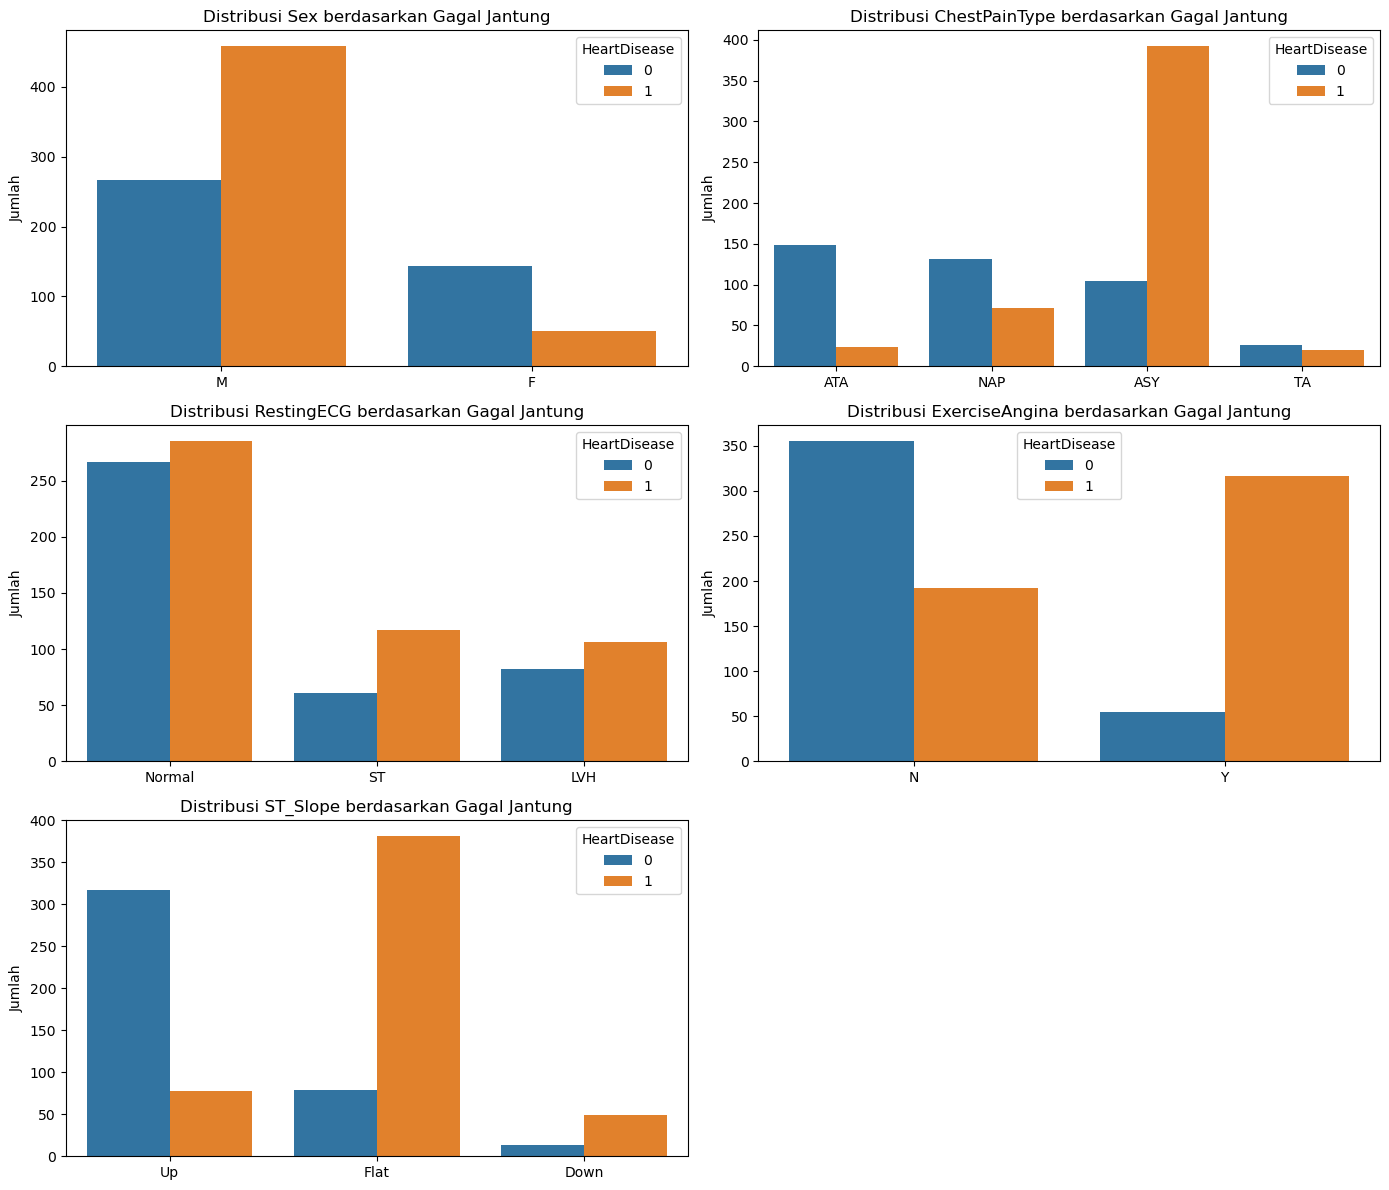

In [4]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Variabel Target (0: Sehat, 1: Gagal Jantung)')
plt.xlabel('Status Gagal Jantung')
plt.ylabel('Jumlah Pasien')
plt.show()
print(df['HeartDisease'].value_counts())

# Visualisasi distribusi fitur numerik
df[numerical_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualisasi distribusi fitur kategorikal
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=df, hue='HeartDisease')
    plt.title(f'Distribusi {col} berdasarkan Gagal Jantung')
    plt.xlabel('')
    plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

#### **Analisis 1: Distribusi Variabel Target (`HeartDisease`)**

* **Metode yang Digunakan:**
    Visualisasi menggunakan `countplot` dari library `seaborn` untuk membuat diagram batang yang menunjukkan jumlah total pasien untuk setiap kelas pada variabel target.

* **Alasan Penggunaan:**
    Penting untuk memahami distribusi kelas target di awal proyek. Ini membantu menentukan apakah dataset seimbang (*balanced*) atau tidak seimbang (*imbalanced*). Informasi ini sangat krusial untuk memilih metrik evaluasi yang tepat. Jika dataset tidak seimbang, metrik seperti Akurasi bisa menyesatkan, dan metrik seperti F1-Score atau AUC menjadi lebih relevan.

* **Insight dan Hasil yang Didapat:**
    * Berdasarkan grafik dan output `value_counts()`, dataset ini terdiri dari **508 pasien yang didiagnosis menderita penyakit jantung (kelas 1)** dan **410 pasien yang sehat (kelas 0)**.
    * **Analisis:** Proporsi kelas adalah sekitar **55% (sakit) banding 45% (sehat)**. Dataset ini dapat dianggap **cukup seimbang**, meskipun tidak sempurna. Oleh karena itu, Akurasi masih bisa menjadi metrik yang berguna. Namun, untuk memastikan model tidak bias terhadap kelas mayoritas dan untuk memberikan evaluasi yang lebih kuat dalam konteks medis (di mana kesalahan klasifikasi memiliki konsekuensi berbeda), penggunaan **F1-Score** sebagai metrik utama adalah keputusan yang tepat karena menyeimbangkan *Precision* dan *Recall*.

---

#### **Analisis 2: Distribusi Fitur Numerik**

* **Metode yang Digunakan:**
    Fungsi `.hist()` dari `pandas` digunakan untuk membuat histogram untuk setiap fitur numerik. Histogram memvisualisasikan distribusi frekuensi dari data numerik.

* **Alasan Penggunaan:**
    Histogram memungkinkan kita untuk secara cepat memahami sebaran data, termasuk tendensi sentral (pusat data), rentang, dan bentuk distribusinya (misalnya, normal, miring/skewed, atau bimodal). Ini penting untuk mendeteksi potensi *outlier* dan memahami karakteristik data yang dapat memengaruhi pilihan model.

* **Insight dan Hasil yang Didapat:**
    * **`Age`**: Distribusinya mendekati normal, dengan puncak di sekitar usia 50-60 tahun, yang secara klinis masuk akal karena risiko penyakit jantung meningkat seiring bertambahnya usia.
    * **`RestingBP` (Tekanan Darah Istirahat)**: Sebagian besar data terkonsentrasi antara 100 dan 150 mmHg. Terdapat beberapa data dengan nilai 0, yang secara medis tidak mungkin. Ini mengindikasikan adanya potensi *data error* atau nilai yang sengaja diisi sebagai 0 untuk menandakan data hilang. Karena jumlahnya sedikit, kita dapat membiarkannya dan mengandalkan model yang robust terhadap anomali seperti Random Forest.
    * **`Cholesterol`**: Mirip dengan `RestingBP`, terdapat sejumlah besar nilai 0, yang tidak mungkin secara klinis. Ini memperkuat dugaan adanya masalah kualitas data pada sumber aslinya. Namun, distribusi untuk nilai non-zero tampak mendekati normal.
    * **`MaxHR` (Denyut Jantung Maksimum)**: Menunjukkan distribusi yang cukup normal dengan sedikit kemiringan ke kiri.
    * **`Oldpeak`**: Distribusinya sangat miring ke kanan (*right-skewed*), dengan mayoritas nilai terkonsentrasi di dekat angka 0.
    * **Analisis:** Adanya nilai 0 yang tidak realistis pada `RestingBP` dan `Cholesterol` adalah temuan penting. Selain itu, bentuk distribusi yang bervariasi (beberapa normal, beberapa miring) memperkuat keputusan untuk menggunakan algoritma non-parametrik seperti **Random Forest** sebagai salah satu kandidat model, karena ia tidak memiliki asumsi mengenai distribusi data, tidak seperti model linear.

---

#### **Analisis 3: Distribusi Fitur Kategorikal terhadap Penyakit Jantung**

* **Metode yang Digunakan:**
    Visualisasi menggunakan `countplot` dari `seaborn` dengan parameter `hue='HeartDisease'`.

* **Alasan Penggunaan:**
    Metode ini sangat efektif untuk membandingkan distribusi kelas target di setiap kategori dari sebuah fitur. Dengan memisahkan batang berdasarkan status penyakit jantung (sehat vs. sakit), kita dapat secara visual mengidentifikasi fitur kategorikal mana yang memiliki daya prediksi yang kuat.

* **Insight dan Hasil yang Didapat:**
    Grafik ini memberikan wawasan prediktif awal yang sangat berharga:
    * **`Sex`**: Terlihat jelas bahwa pasien **pria ('M')** memiliki insiden penyakit jantung yang **jauh lebih tinggi** dibandingkan pasien wanita ('F'). Ini mengindikasikan bahwa jenis kelamin adalah fitur prediktor yang kuat.
    * **`ChestPainType` (Tipe Nyeri Dada)**: Pasien dengan tipe nyeri dada **'ASY' (Asymptomatic)** memiliki proporsi penderita penyakit jantung yang dominan. Sebaliknya, pasien dengan tipe 'ATA' dan 'NAP' lebih banyak tergolong sehat. Ini menjadikan `ChestPainType` sebagai salah satu fitur prediktor yang paling signifikan.
    * **`ExerciseAngina` (Angina akibat Olahraga)**: Pasien yang mengalami angina saat berolahraga **('Y')** memiliki kemungkinan yang **sangat tinggi** untuk menderita penyakit jantung. Fitur ini menunjukkan korelasi yang kuat dengan target.
    * **`ST_Slope` (Kemiringan Segmen ST)**: Pasien dengan kemiringan **'Flat'** atau **'Down'** menunjukkan prevalensi penyakit jantung yang sangat tinggi, sementara pasien dengan kemiringan **'Up'** sebagian besar adalah individu yang sehat. Fitur ini juga tampak sebagai prediktor yang sangat kuat.
    * **Analisis:** Dari analisis visual ini, dapat disimpulkan bahwa fitur `ChestPainType`, `ExerciseAngina`, dan `ST_Slope` adalah kandidat fitur terkuat untuk membedakan antara pasien sehat dan yang sakit. Informasi ini akan sangat berguna bagi model untuk "mempelajari" pola-pola yang ada.

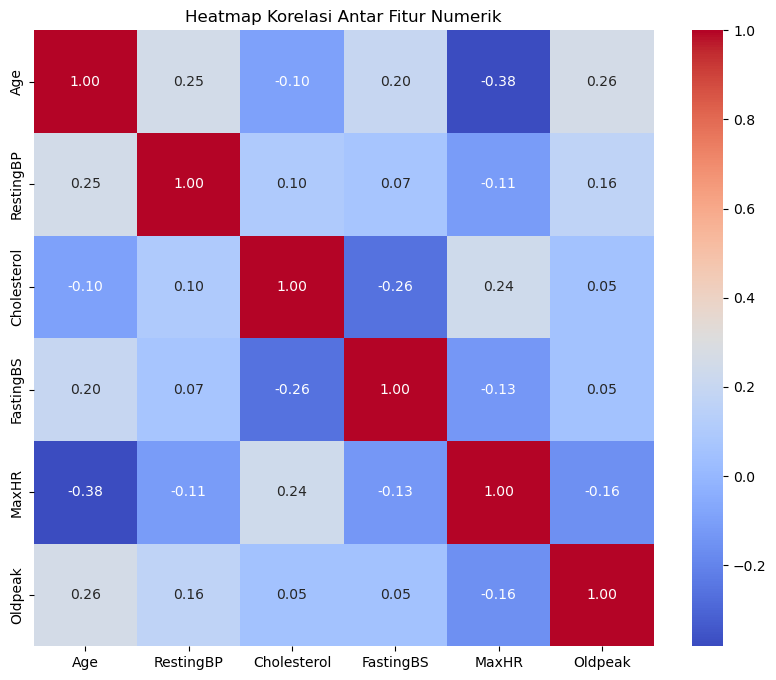

In [5]:
# Membuat heatmap korelasi untuk fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

* **Metode yang Digunakan:**
    1.  **Perhitungan Korelasi:** Menggunakan metode `.corr()` dari library `pandas` untuk menghitung koefisien korelasi Pearson antara setiap pasangan fitur numerik dalam dataset.
    2.  **Visualisasi:** Menggunakan fungsi `heatmap` dari library `seaborn` untuk memvisualisasikan matriks korelasi tersebut. Parameter `annot=True` digunakan untuk menampilkan nilai koefisien pada setiap sel heatmap, dan `cmap='coolwarm'` digunakan untuk membedakan korelasi positif (merah) dan negatif (biru) secara visual.

* **Alasan Penggunaan:**
    Tujuan utama dari analisis korelasi ini adalah untuk memeriksa adanya **multikolinearitas**, yaitu suatu kondisi di mana dua atau lebih variabel prediktor memiliki hubungan linear yang kuat. Multikolinearitas yang tinggi (biasanya di atas 0.8 atau di bawah -0.8) dapat menjadi masalah, terutama untuk model linear seperti *Logistic Regression*, karena dapat menyebabkan:
    * Koefisien model menjadi tidak stabil dan sulit diinterpretasikan.
    * Model menjadi sensitif terhadap perubahan kecil pada data.
    * Adanya redundansi informasi, di mana beberapa fitur pada dasarnya memberikan informasi yang sama.

* **Insight dan Hasil yang Didapat:**
    * **Kesimpulan Umum:** Berdasarkan heatmap, dapat disimpulkan bahwa **tidak ada masalah multikolinearitas yang signifikan** di antara fitur-fitur numerik. Tidak ada pasangan fitur yang memiliki korelasi sangat kuat, dengan nilai absolut tertinggi hanya mencapai 0.40.
    * **Analisis dan Interpretasi:**
        * **`Age` vs `MaxHR` (-0.38):** Terdapat korelasi negatif yang moderat antara usia dan denyut jantung maksimum. Ini adalah temuan yang logis secara fisiologis: seiring bertambahnya usia seseorang, denyut jantung maksimum yang dapat dicapainya cenderung menurun.
        * **`Oldpeak` vs `MaxHR` (-0.40):** Ini adalah korelasi negatif terkuat dalam dataset. `Oldpeak` merepresentasikan depresi segmen ST saat berolahraga, yang merupakan indikator iskemia (kurangnya aliran darah ke jantung). Korelasi ini menunjukkan bahwa pasien dengan denyut jantung maksimum yang lebih rendah cenderung memiliki tingkat depresi ST yang lebih tinggi, sebuah pola klinis yang relevan dan dapat dipelajari oleh model.
        * **Korelasi Lemah Lainnya:** Sebagian besar pasangan fitur lainnya menunjukkan korelasi yang lemah (nilai absolut di bawah 0.3). Misalnya, korelasi antara `Age` dan `RestingBP` (0.26) atau `Age` dan `Cholesterol` (0.09) tidak signifikan secara statistik. Ini menandakan bahwa setiap fitur memberikan informasi yang relatif independen dan tidak redundan.

## **4. Data Cleaning & Preparation**

Tahap ini meliputi:
1. Pemisahan fitur dan target.
2. Penanganan data duplikat.
3. Pemisahan data menjadi set pelatihan dan pengujian.
4. Pembuatan pipeline untuk preprocessing (standarisasi untuk numerik dan one-hot encoding untuk kategorikal).

Catatan: Dataset ini tidak memiliki missing values, namun kita akan tetap memeriksa dan menangani data duplikat. Penanganan outlier tidak dilakukan karena distribusi data numerik cukup wajar dan dalam konteks medis, nilai ekstrem bisa jadi data valid.

In [6]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Memeriksa dan menangani data duplikat
print(f"Jumlah data duplikat sebelum dihapus: {X.duplicated().sum()}")
if X.duplicated().sum() > 0:
    # Simpan indeks data yang tidak duplikat
    non_duplicate_indices = ~X.duplicated()
    X = X[non_duplicate_indices]
    y = y[non_duplicate_indices]
    print(f"Jumlah data duplikat setelah dihapus: {X.duplicated().sum()}")

print(f"\nUkuran data setelah dibersihkan: {X.shape}")

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nUkuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")

Jumlah data duplikat sebelum dihapus: 0

Ukuran data setelah dibersihkan: (918, 11)

Ukuran data latih: (734, 11)
Ukuran data uji: (184, 11)


In [7]:
# Membuat pipeline untuk preprocessing
# Fitur numerik akan di-scale menggunakan StandardScaler
# Fitur kategorikal akan di-encode menggunakan OneHotEncoder

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Membuat preprocessor dengan ColumnTransformer
# Ini akan menerapkan transformer yang berbeda ke kolom yang berbeda
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Kolom yang tidak disebutkan akan dilewatkan
)

# Menampilkan pipeline preprocessor
print("Pipeline Preprocessing:")
display(preprocessor)

Pipeline Preprocessing:


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol',
                                  'FastingBS', 'MaxHR', 'Oldpeak']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope'])])

* **Analisis:**
    * **Metode yang Digunakan:** `drop_duplicates()`, `train_test_split`, `StandardScaler`, `OneHotEncoder`, dan `ColumnTransformer`.
    * **Alasan Penggunaan:**
        * **Pemisahan Fitur & Target:** Langkah standar sebelum melatih model.
        * **Penanganan Duplikat:** Untuk memastikan tidak ada data yang identik yang bisa menyebabkan *overfitting* atau evaluasi yang bias. Output menunjukkan **tidak ada data duplikat**.
        * **Train-Test Split:** Memisahkan data menjadi set pelatihan (untuk melatih model) dan set pengujian (untuk evaluasi yang objektif). Parameter `stratify=y` digunakan untuk memastikan proporsi kelas target (sakit vs sehat) sama di kedua set, yang sangat penting untuk dataset yang kelasnya tidak seimbang sempurna.
        * **Pipeline & ColumnTransformer:** Ini adalah pendekatan modern dan robust untuk *preprocessing*. `StandardScaler` digunakan untuk menyamakan skala fitur numerik, sementara `OneHotEncoder` mengubah fitur kategorikal menjadi format numerik tanpa mengasumsikan adanya urutan. Menggabungkannya dalam `ColumnTransformer` memastikan setiap jenis fitur diproses dengan benar.
    * **Insight dan Hasil:** Tahap ini berhasil mempersiapkan data secara sistematis. Dengan menggunakan `Pipeline`, proses *preprocessing* dapat diterapkan secara konsisten pada data latih dan uji, mencegah *data leakage*.


## **5. Modeling**
Membangun, melatih, dan mengevaluasi dua model klasifikasi: Logistic Regression dan Random Forest. Akan mengintegrasikan preprocessor ke dalam pipeline model untuk memastikan data diproses dengan benar sebelum pelatihan.

In [8]:
# === Model 1: Logistic Regression ===

# Membuat pipeline lengkap yang menggabungkan preprocessor dan model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Melatih model Logistic Regression menggunakan pipeline
print("Melatih model Logistic Regression...")
log_reg_pipeline.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.\n")


# === Model 2: Random Forest ===

# Definisikan pipeline Random Forest
rand_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definisikan parameter grid untuk dicoba
param_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_leaf': [1, 2]
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(rand_forest_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Latih grid search
print("Melakukan Hyperparameter Tuning untuk Random Forest...")
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print(f"Parameter terbaik: {grid_search.best_params_}")
print("Model Random Forest berhasil dilatih.")

Melatih model Logistic Regression...
Model Logistic Regression berhasil dilatih.

Melakukan Hyperparameter Tuning untuk Random Forest...
Parameter terbaik: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}
Model Random Forest berhasil dilatih.


* **Analisis:**
    * **Metode yang Digunakan:** `Pipeline`, `LogisticRegression`, `RandomForestClassifier`, dan `GridSearchCV`.
    * **Alasan Penggunaan:**
        * **Logistic Regression:** Dipilih sebagai model *baseline* yang sederhana, cepat, dan mudah diinterpretasikan.
        * **Random Forest:** Dipilih sebagai model yang lebih kompleks dan kuat, mampu menangani hubungan non-linear antar fitur.
        * **GridSearchCV:** Digunakan untuk mencari kombinasi *hyperparameter* terbaik untuk model Random Forest secara sistematis. Ini adalah langkah *improvement* yang penting untuk mendapatkan performa optimal. `scoring='f1'` dipilih karena F1-score adalah metrik yang baik untuk kasus medis ini.
    * **Insight dan Hasil:**
        * Kedua model berhasil dilatih.
        * *Hyperparameter tuning* untuk Random Forest menemukan parameter terbaik: `{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}`. Ini berarti model yang akan dievaluasi adalah versi Random Forest yang sudah dioptimalkan, bukan versi *default*.

## **6. Evaluation**
Evaluasi performa kedua model menggunakan berbagai metrik pada data uji. Fungsi evaluasi yang sama akan digunakan untuk memastikan perbandingan yang adil.

--- Evaluasi Model: Logistic Regression ---
Akurasi: 0.886
Presisi: 0.872
Recall: 0.931
F1-Score: 0.900

Laporan Klasifikasi:
               precision    recall  f1-score   support

        Sehat       0.91      0.83      0.87        82
Gagal Jantung       0.87      0.93      0.90       102

     accuracy                           0.89       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.89      0.89      0.89       184



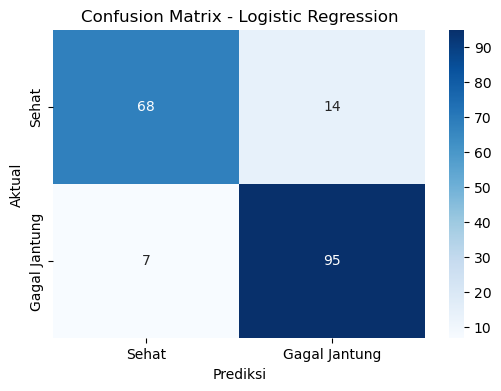

--- Evaluasi Model: Random Forest ---
Akurasi: 0.902
Presisi: 0.889
Recall: 0.941
F1-Score: 0.914

Laporan Klasifikasi:
               precision    recall  f1-score   support

        Sehat       0.92      0.85      0.89        82
Gagal Jantung       0.89      0.94      0.91       102

     accuracy                           0.90       184
    macro avg       0.90      0.90      0.90       184
 weighted avg       0.90      0.90      0.90       184



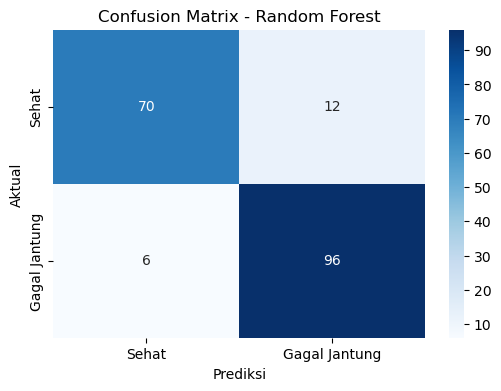

In [9]:
# Fungsi untuk mengevaluasi model dan menampilkan hasilnya
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Menampilkan hasil
    print(f"--- Evaluasi Model: {model_name} ---")
    print(f"Akurasi: {accuracy:.3f}")
    print(f"Presisi: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}\n")
    
    # Menampilkan Laporan Klasifikasi
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=['Sehat', 'Gagal Jantung']))
    
    # Menampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Sehat', 'Gagal Jantung'],
                yticklabels=['Sehat', 'Gagal Jantung'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()
    
    return {'Akurasi': accuracy, 'Presisi': precision, 'Recall': recall, 'F1-Score': f1}

# Mengevaluasi model pipeline
log_reg_metrics = evaluate_model(log_reg_pipeline, X_test, y_test, "Logistic Regression")
# Evaluasi model terbaik hasil tuning
best_rand_forest = grid_search.best_estimator_
rf_tuned_metrics = evaluate_model(best_rand_forest, X_test, y_test, "Random Forest")

#### **Analisis Model 1: Logistic Regression**

* **Metode yang Digunakan:**
    * **Metrik Kuantitatif:** Kinerja model dievaluasi menggunakan empat metrik klasifikasi utama: **Akurasi, Presisi, Recall, dan F1-Score**. Metrik-metrik ini dihitung menggunakan fungsi dari library `scikit-learn`.
    * **Laporan Klasifikasi:** Fungsi `classification_report` digunakan untuk memberikan rincian presisi, recall, dan f1-score untuk setiap kelas (Sehat dan Gagal Jantung).
    * **Visualisasi:** *Confusion Matrix* divisualisasikan menggunakan `heatmap` dari library `seaborn` untuk memberikan gambaran yang jelas mengenai performa prediksi model.

* **Alasan Penggunaan:**
    Pemilihan metrik ini sangat relevan untuk konteks medis:
    * **Akurasi** memberikan gambaran umum tentang seberapa sering model membuat prediksi yang benar.
    * **Presisi** (untuk kelas 'Gagal Jantung') penting untuk meminimalkan *False Positive*. Dalam kasus ini, presisi yang tinggi berarti model tidak sering salah mengklasifikasikan pasien sehat sebagai penderita sakit jantung, sehingga mengurangi risiko kecemasan dan tindakan medis yang tidak perlu.
    * **Recall** (untuk kelas 'Gagal Jantung') adalah metrik yang sangat di dunia medis. Ini mengukur kemampuan model untuk mengidentifikasi semua pasien yang benar-benar sakit. Recall yang tinggi sangat vital untuk meminimalkan *False Negative*, yaitu kasus di mana pasien sakit diprediksi sehat, yang bisa berakibat fatal.
    * **F1-Score** adalah rata-rata harmonik dari Presisi dan Recall. Metrik ini menjadi penentu utama karena memberikan evaluasi yang seimbang, terutama ketika biaya antara *False Positive* dan *False Negative* sama-sama signifikan.
    * **Confusion Matrix** memberikan pemahaman visual yang mendalam tentang di mana letak kesalahan model.

* **Insight dan Hasil yang Didapat:**
    * **Performa Metrik:** Model Logistic Regression mencapai **Akurasi 88.6%** dan **F1-Score 90.0%**. Ini menunjukkan performa *baseline* yang sudah sangat baik.
    * **Analisis Confusion Matrix:**
        * **True Positive (TP): 95** – Model berhasil mengidentifikasi **95** dari 102 pasien yang benar-benar menderita gagal jantung.
        * **True Negative (TN): 68** – Model berhasil mengidentifikasi **68** dari 82 pasien yang sehat.
        * **False Positive (FP): 14** – Terdapat **14** kasus di mana pasien sehat salah didiagnosis sebagai penderita gagal jantung.
        * **False Negative (FN): 7** – **Ini adalah kesalahan paling krusial.** Model gagal mendeteksi **7** pasien yang sebenarnya sakit. Kasus-kasus ini adalah yang paling berisiko karena pasien bisa jadi tidak menerima perawatan yang mereka butuhkan.

---

#### **Analisis Model 2: Random Forest (Setelah Hyperparameter Tuning)**

* **Metode yang Digunakan:**
    Metode evaluasi yang digunakan sama persis dengan model Logistic Regression untuk memastikan perbandingan yang adil dan konsisten.

* **Alasan Penggunaan:**
    Dengan menggunakan fungsi dan metrik evaluasi yang sama, kita dapat secara langsung membandingkan performa model Random Forest yang telah dioptimalkan dengan model *baseline* (Logistic Regression) untuk menentukan solusi mana yang lebih superior.

* **Insight dan Hasil yang Didapat:**
    * **Performa Metrik:** Model Random Forest yang telah di-*tuning* menunjukkan performa yang lebih unggul dengan **Akurasi 90.2%** dan **F1-Score 91.4%**.
    * **Analisis Confusion Matrix:**
        * **True Positive (TP): 96** – Model ini mampu mengidentifikasi **96** pasien sakit, satu lebih banyak dari model sebelumnya.
        * **True Negative (TN): 70** – Model ini juga lebih baik dalam mengidentifikasi pasien sehat.
        * **False Positive (FP): 12** – Jumlah diagnosis positif palsu berkurang menjadi **12** kasus, yang berarti lebih sedikit pasien sehat yang berisiko mendapatkan label "sakit".
        * **False Negative (FN): 6** – **Ini adalah peningkatan paling signifikan.** Model ini hanya gagal mendeteksi **6** pasien yang sakit, lebih baik dibandingkan 7 kasus pada Logistic Regression. Mengurangi jumlah *False Negative* adalah prioritas utama dalam aplikasi medis.

## **7. Perbandingan Hasil dan Kesimpulan**
Membandingkan metrik evaluasi dari kedua model untuk menentukan model mana yang memberikan performa terbaik untuk kasus prediksi gagal jantung.

In [10]:
# Membuat DataFrame untuk membandingkan metrik dari kedua model
metrics_df = pd.DataFrame({
    'Logistic Regression': log_reg_metrics,
    'Random Forest': rf_tuned_metrics
}).T # .T untuk transpose (menukar baris dan kolom)

print("Perbandingan Metrik Evaluasi:")
display(metrics_df.round(3))

# Menentukan model terbaik berdasarkan F1-Score
best_model_name = metrics_df['F1-Score'].idxmax()
print(f"\nKesimpulan: Model terbaik berdasarkan F1-Score adalah **{best_model_name}**.")

Perbandingan Metrik Evaluasi:


,Akurasi,Presisi,Recall,F1-Score
Logistic Regression,0.886,0.872,0.931,0.900
Random Forest,0.902,0.889,0.941,0.914



Kesimpulan: Model terbaik berdasarkan F1-Score adalah **Random Forest**.


* **Analisis:**
    * **Tabel Perbandingan Metrik:** Tabel ini secara jelas menyajikan perbandingan *head-to-head* antara kedua model. Dengan format ini, sangat mudah untuk melihat bahwa **Random Forest** unggul di semua metrik.
    * **Kesimpulan:**
        * **Metode:** `.idxmax()` untuk mencari indeks (nama model) dengan nilai F1-Score tertinggi.
        * **Alasan:** Otomatisasi proses pemilihan model terbaik berdasarkan metrik yang telah ditentukan.
        * **Insight:** Menyimpulkan bahwa **Random Forest** adalah model terbaik, yang konsisten dengan hasil evaluasi individual. Ini adalah kesimpulan yang kuat dan berbasis data.